In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as lines
import xesmf as xe
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc
import cartopy.crs as ccrs
import warnings
from tqdm.auto import tqdm
warnings.filterwarnings('ignore')

In [2]:
def regridder_pr(file, pi=True):
    # read in data from nc file
    # 960: 1930
    # 960+600: 1980
    ds = xr.open_dataset(file)
    ds_pr = ds['pr'][960:960+600, :, :] if pi else ds['pr'][-600:, :, :]
    
    # define the grid of the output file
    ds_out = xr.Dataset(
        {"lat": (["lat"], np.arange(-89.5, 90.5, 1.0)),
        "lon": (["lon"], np.arange(0.5, 360.5, 1.0)),})
    
    # build regridder and calculate
    regridder = xe.Regridder(ds, ds_out, "bilinear")
    ds_pr_out = regridder(ds_pr)
    
    # calculate the mean precipitation over some area
    # lat: 90-110 = 0.5 - 19.5 
    # lon: 130-270 = 130.5 - 269.5
    # pr_ts = ds_pr_out[:,95:105,130:270].mean(axis=1).mean(axis=1)
    
    return np.array(ds_pr_out)

In [3]:
model_list_23 = ["ACCESS-CM2", "ACCESS-ESM1-5", "AWI-CM-1-1-MR",
                 "AWI-ESM-1-REcoM", "BCC-CSM2-MR", "CAMS-CSM1-0", 
                 "CanESM5", "CanESM5-1", "CAS-ESM2-0", 
                 "CESM2-WACCM", "CMCC-CM2-SR5", "CMCC-ESM2", 
                 "FGOALS-g3", "FIO-ESM-2-0", "IITM-ESM",
                 "MIROC6", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", 
                 "MRI-ESM2-0", "NESM3", "NorESM2-LM", 
                 "NorESM2-MM", "TaiESM1"]   # 23 models

ACCESS_CM2_pi     = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/ACCESS-CM2/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc"
ACCESS_CM2_ssp    = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/ACCESS-CM2/pr_Amon_ACCESS-CM2_ssp585_r1i1p1f1_gn_201501-210012.nc"
ACCESS_ESM1_5_pi  = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/ACCESS-ESM1-5/pr_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc"
ACCESS_ESM1_5_ssp = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/ACCESS-ESM1-5/pr_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_gn_201501-210012.nc"
AWI_CM_1_1_MR_pi  = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/AWI-CM-1-1-MR/pr_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185001-201412.nc"
AWI_CM_1_1_MR_ssp = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/AWI-CM-1-1-MR/pr_Amon_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_201501-210012.nc"
AWI_ESM_1_REcoM_pi = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/AWI-ESM-1-REcoM/pr_Amon_AWI-ESM-1-REcoM_historical_r1i1p1f1_gn_185001-201412.nc"
AWI_ESM_1_REcoM_ssp = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/AWI-ESM-1-REcoM/pr_Amon_AWI-ESM-1-REcoM_ssp585_r1i1p1f1_gn_201501-210012.nc"
BCC_CSM2_MR_pi    = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/BCC-CSM2-MR/pr_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc"
BCC_CSM2_MR_ssp   = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/BCC-CSM2-MR/pr_Amon_BCC-CSM2-MR_ssp585_r1i1p1f1_gn_201501-210012.nc"
CAMS_CSM1_0_pi = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/CAMS-CSM1-0/pr_Amon_CAMS-CSM1-0_historical_r1i1p1f1_gn_185001-201412.nc"
CAMS_CSM1_0_ssp = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/CAMS-CSM1-0/pr_Amon_CAMS-CSM1-0_ssp585_r1i1p1f1_gn_201501-209912.nc"
CanESM5_pi        = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/CanESM5/pr_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc"
CanESM5_ssp       = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/CanESM5/pr_Amon_CanESM5_ssp585_r1i1p1f1_gn_201501-210012.nc"
CanESM5_1_pi        = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/CanESM5-1/pr_Amon_CanESM5-1_historical_r1i1p1f1_gn_185001-201412.nc"
CanESM5_1_ssp       = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/CanESM5-1/pr_Amon_CanESM5-1_ssp585_r1i1p1f1_gn_201501-210012.nc"
CAS_ESM2_0_pi     = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/CAS-ESM2-0/pr_Amon_CAS-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc"
CAS_ESM2_0_ssp    = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/CAS-ESM2-0/pr_Amon_CAS-ESM2-0_ssp585_r1i1p1f1_gn_201501-210012.nc"
CESM2_WACCM_pi    = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/CESM2-WACCM/pr_Amon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc"
CESM2_WACCM_ssp   = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/CESM2-WACCM/pr_Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc"
CMCC_CM2_SR5_pi   = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/CMCC-CM2-SR5/pr_Amon_CMCC-CM2-SR5_historical_r1i1p1f1_gn_185001-201412.nc"
CMCC_CM2_SR5_ssp  = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/CMCC-CM2-SR5/pr_Amon_CMCC-CM2-SR5_ssp585_r1i1p1f1_gn_201501-210012.nc"
CMCC_ESM2_pi      = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/CMCC-ESM2/pr_Amon_CMCC-ESM2_historical_r1i1p1f1_gn_185001-201412.nc"
CMCC_ESM2_ssp     = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/CMCC-ESM2/pr_Amon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012.nc"
FGOALS_g3_pi      = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/FGOALS-g3/pr_Amon_FGOALS-g3_historical_r1i1p1f1_gn_185001-201412.nc"
FGOALS_g3_ssp     = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/FGOALS-g3/pr_Amon_FGOALS-g3_ssp585_r1i1p1f1_gn_201501-210012.nc"
FIO_ESM_2_0_pi    = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/FIO-ESM-2-0/pr_Amon_FIO-ESM-2-0_historical_r1i1p1f1_gn_185001-201412.nc"
FIO_ESM_2_0_ssp   = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/FIO-ESM-2-0/pr_Amon_FIO-ESM-2-0_ssp585_r1i1p1f1_gn_201501-210012.nc"
IITM_ESM_pi  = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/IITM-ESM/pr_Amon_IITM-ESM_historical_r1i1p1f1_gn_185001-201412.nc"
IITM_ESM_ssp  = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/IITM-ESM/pr_Amon_IITM-ESM_ssp585_r1i1p1f1_gn_201501-210012.nc"
MIROC6_pi         = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/MIROC6/pr_Amon_MIROC6_historical_r1i1p1f1_gn_185001-201412.nc"
MIROC6_ssp        = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/MIROC6/pr_Amon_MIROC6_ssp585_r1i1p1f1_gn_201501-210012.nc"
MPI_ESM1_2_HR_pi  = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/MPI-ESM1-2-HR/pr_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_185001-201412.nc"
MPI_ESM1_2_HR_ssp = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/MPI-ESM1-2-HR/pr_Amon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_205001-210012.nc"
MPI_ESM1_2_LR_pi  = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/MPI-ESM1-2-LR/pr_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_185001-201412.nc"
MPI_ESM1_2_LR_ssp = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/MPI-ESM1-2-LR/pr_Amon_MPI-ESM1-2-LR_ssp585_r1i1p1f1_gn_201501-210012.nc"
MRI_ESM2_0_pi     = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/MRI-ESM2-0/pr_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc"
MRI_ESM2_0_ssp    = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/MRI-ESM2-0/pr_Amon_MRI-ESM2-0_ssp585_r1i1p1f1_gn_201501-210012.nc"
NESM3_pi          = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/NESM3/pr_Amon_NESM3_historical_r1i1p1f1_gn_185001-201412.nc"
NESM3_ssp         = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/NESM3/pr_Amon_NESM3_ssp585_r1i1p1f1_gn_201501-210012.nc"
NorESM2_LM_pi     = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/NorESM2-LM/pr_Amon_NorESM2-LM_historical_r1i1p1f1_gn_185001-201412.nc"
NorESM2_LM_ssp    = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/NorESM2-LM/pr_Amon_NorESM2-LM_ssp585_r1i1p1f1_gn_205101-210012.nc"
NorESM2_MM_pi     = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/NorESM2-MM/pr_Amon_NorESM2-MM_historical_r1i1p1f1_gn_185001-201412.nc"
NorESM2_MM_ssp    = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/NorESM2-MM/pr_Amon_NorESM2-MM_ssp585_r1i1p1f1_gn_205101-210012.nc"
TaiESM1_pi        = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/TaiESM1/pr_Amon_TaiESM1_historical_r1i1p1f1_gn_185001-201412.nc"
TaiESM1_ssp       = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/TaiESM1/pr_Amon_TaiESM1_ssp585_r1i1p1f1_gn_201501-210012.nc"


piControl_23 = [ACCESS_CM2_pi, ACCESS_ESM1_5_pi, AWI_CM_1_1_MR_pi,
                AWI_ESM_1_REcoM_pi, BCC_CSM2_MR_pi, CAMS_CSM1_0_pi,
                CanESM5_pi, CanESM5_1_pi, CAS_ESM2_0_pi, 
                CESM2_WACCM_pi, CMCC_CM2_SR5_pi, CMCC_ESM2_pi, 
                FGOALS_g3_pi, FIO_ESM_2_0_pi, IITM_ESM_pi,
                MIROC6_pi, MPI_ESM1_2_HR_pi, MPI_ESM1_2_LR_pi, 
                MRI_ESM2_0_pi, NESM3_pi, NorESM2_LM_pi, 
                NorESM2_MM_pi, TaiESM1_pi]

ssp585_23 = [ACCESS_CM2_ssp, ACCESS_ESM1_5_ssp, AWI_CM_1_1_MR_ssp,
                AWI_ESM_1_REcoM_ssp, BCC_CSM2_MR_ssp, CAMS_CSM1_0_ssp,
                CanESM5_ssp, CanESM5_1_ssp, CAS_ESM2_0_ssp, 
                CESM2_WACCM_ssp, CMCC_CM2_SR5_ssp, CMCC_ESM2_ssp, 
                FGOALS_g3_ssp, FIO_ESM_2_0_ssp, IITM_ESM_ssp,
                MIROC6_ssp, MPI_ESM1_2_HR_ssp, MPI_ESM1_2_LR_ssp, 
                MRI_ESM2_0_ssp, NESM3_ssp, NorESM2_LM_ssp, 
                NorESM2_MM_ssp, TaiESM1_ssp]

pi_pr = []
ssp_pr = []
for i in tqdm(range(len(piControl_23))):
    pi_pr.append(regridder_pr(piControl_23[i], True))
    ssp_pr.append(regridder_pr(ssp585_23[i], False))
    #print("finish"+str(piControl[i])+ " "+ str(i+1)+"/"+str(len(piControl)))

  0%|          | 0/23 [00:00<?, ?it/s]

In [9]:
def regridder_ERA(file):
    # read in data from nc file
    ds = xr.open_dataset(file)
    #ds_pr = ds['pr'][:6000, :, :]
    ds_pr = ds['tp'][:,:,:]
    
    # define the grid of the output file
    ds_out = xr.Dataset(
        {"lat": (["lat"], np.arange(-89.5, 90.5, 1.0)),
        "lon": (["lon"], np.arange(0.5, 360.5, 1.0)),})
    
    # build regridder and calculate
    regridder = xe.Regridder(ds, ds_out, "bilinear")
    ds_pr_out = regridder(ds_pr)
    
    # calculate the mean precipitation over some area
    # lat: 90-110 = 0.5 - 19.5 
    # lon: 130-270 = 130.5 - 269.5
    # pr_ts = ds_pr_out[:,95:105,130:270].mean(axis=1).mean(axis=1)
    
    return np.array(ds_pr_out)*1000

ERA5     = "/gpfs/gibbs/pi/fedorov/zhiyuan/CMIP6_ITCZ_TS/ERA5_197901-202012.nc"
ERA5_His = regridder_ERA(ERA5)

In [4]:
sum_pi_pr = 0
sum_ssp_pr = 0
for i in range(len(pi_pr)):
    sum_pi_pr += pi_pr[i]
    sum_ssp_pr += ssp_pr[i]
avg_pi_pr = (sum_pi_pr / len(pi_pr)).reshape((1,600,180,360))
avg_ssp_pr = (sum_ssp_pr / len(pi_pr)).reshape((1,600,180,360))

In [5]:
def plot_pr(rows, cols, i, pr):
    ax = plt.subplot(rows, cols, i+1, projection=ccrs.PlateCarree(central_longitude=180))
    i=0
    f = ax.contourf(np.arange(-180.5, 179.5, 1.0), np.arange(-89.5, 90.5, 1.0), pr[i].mean(axis=0)*86400, cmap=cm.viridis, levels=np.linspace(0, 12, 13), extend='both')
    ax.set_extent([90.01, 300, -45, 45], ccrs.PlateCarree())
    ax.set_title(str(model_list_23[i]), fontsize=20)
    #ax.add_artist(lines.Line2D(np.linspace(-49, 80, 130), np.arange(0.5, 15.5, 1).reshape(1,15) @ pr[i][:,90:105,130:260].mean(axis=0) / pr[i][:,90:105,130:260].mean(axis=0).sum(axis=0), color='w'))
    #ax.add_artist(lines.Line2D(np.linspace(-29, 30, 60), np.arange(-14.5, 0.5, 1).reshape(1,15) @ pr[i][:,75:90,150:210].mean(axis=0) / pr[i][:,75:90,150:210].mean(axis=0).sum(axis=0), color='w'))
    #ax.add_artist(lines.Line2D([30, 90], [0, 0], color='w'))
    #ax.add_artist(lines.Line2D([30, 90], [-10, -10], color='w'))
    #ax.add_artist(lines.Line2D([30, 30], [0, -10], color='w'))
    #ax.add_artist(lines.Line2D([90, 90], [0, -10], color='w'))
    
    ax.coastlines()
    cbar = fig.colorbar(f, orientation="horizontal")
    cbar.set_label(label="mm/day", fontsize=20, loc="right")
    cbar.ax.set_xticklabels(labels=np.linspace(0, 12, 13), fontsize=20)
    g = ax.gridlines(draw_labels=True, xlocs=[-90,-120,-150,30,60,90,120,150,180], ylocs=[-45, -30, -15, 0, 15, 30, 45])
    g.top_labels = False
    g.right_labels = False
    g.xlabel_style = {'size': 13}
    g.ylabel_style = {'size': 13}


In [6]:
def plot_diff_pr(rows, cols, i, ssp_pr, pi_pr):
    ax = plt.subplot(rows, cols, i+1, projection=ccrs.PlateCarree(central_longitude=180))
    i=0
    f = ax.contourf(np.arange(-180.5, 179.5, 1.0), np.arange(-89.5, 90.5, 1.0), (ssp_pr[i].mean(axis=0) - pi_pr[i].mean(axis=0))*86400, cmap=cm.BrBG, levels=np.linspace(-4, 4, 17), extend='both')
    ax.set_extent([90.01, 300, -45, 45], ccrs.PlateCarree())
    ax.set_title(str(model_list_23[i]), fontsize=20)
    #ax.add_artist(lines.Line2D(np.linspace(-49, 80, 130), np.arange(0.5, 15.5, 1).reshape(1,15) @ pi_pr[i][:,90:105,130:260].mean(axis=0) / pi_pr[i][:,90:105,130:260].mean(axis=0).sum(axis=0), color='k'))
    #ax.add_artist(lines.Line2D(np.linspace(-49, 80, 130), np.arange(0.5, 15.5, 1).reshape(1,15) @ ssp_pr[i][:,90:105,130:260].mean(axis=0) / ssp_pr[i][:,90:105,130:260].mean(axis=0).sum(axis=0), color='r'))
    #ax.add_artist(lines.Line2D(np.linspace(-29, 30, 60), np.arange(-14.5, 0.5, 1).reshape(1,15) @ pi_pr[i][:,75:90,150:210].mean(axis=0) / pi_pr[i][:,75:90,150:210].mean(axis=0).sum(axis=0), color='k'))
    #ax.add_artist(lines.Line2D(np.linspace(-29, 30, 60), np.arange(-14.5, 0.5, 1).reshape(1,15) @ ssp_pr[i][:,75:90,150:210].mean(axis=0) / ssp_pr[i][:,75:90,150:210].mean(axis=0).sum(axis=0), color='r'))    
    #ax.add_artist(lines.Line2D([-50, 90], [4, 4], color='k'))
    #ax.add_artist(lines.Line2D([-50, 90], [10, 10], color='k'))
    #ax.add_artist(lines.Line2D([-50, -50], [4, 10], color='k'))
    #ax.add_artist(lines.Line2D([90, 90], [4, 10], color='k'))
    ax.coastlines()
    cbar = fig.colorbar(f, orientation="horizontal")
    cbar.set_label(label="mm/day", fontsize=20, loc="right")
    cbar.ax.set_xticklabels(labels=np.linspace(-4, 4, 17), fontsize=20)
    g = ax.gridlines(draw_labels=True, xlocs=[-90,-120,-150,30,60,90,120,150,180], ylocs=[-45, -30, -15, 0, 15, 30, 45])
    g.top_labels = False
    g.right_labels = False
    g.xlabel_style = {'size': 13}
    g.ylabel_style = {'size': 13}

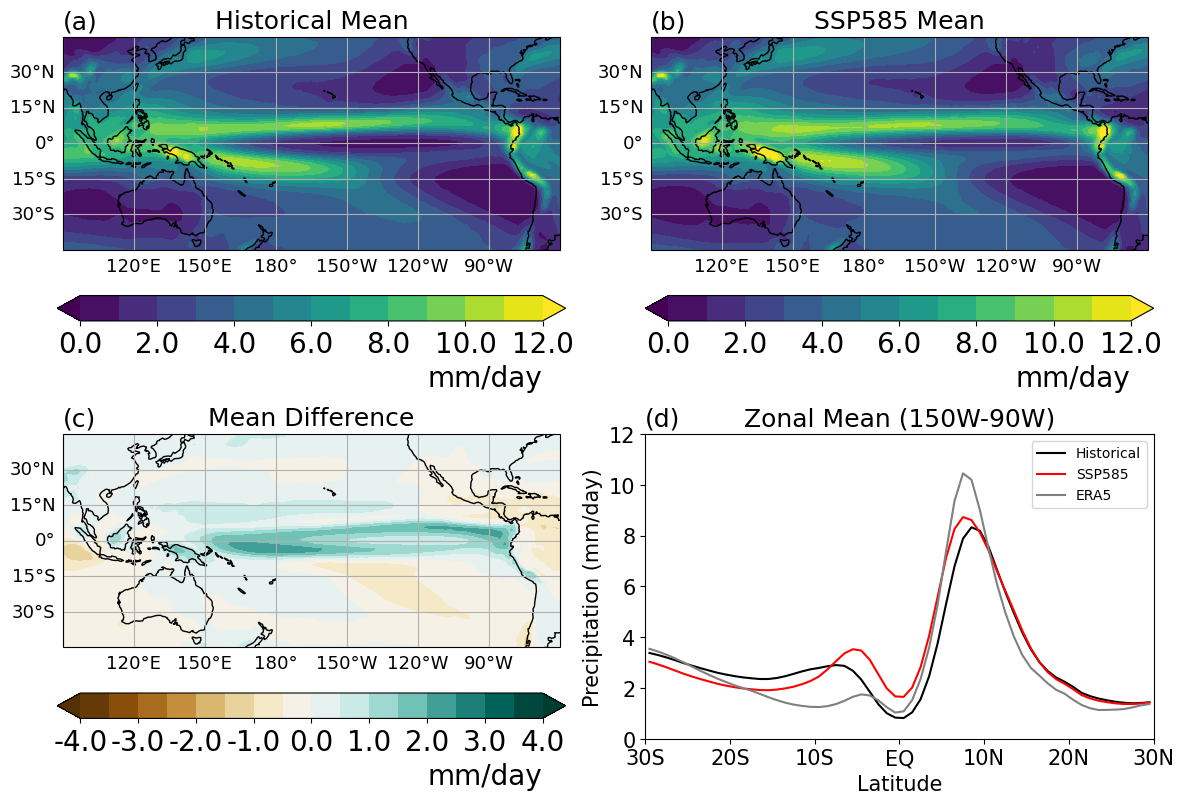

In [11]:
fig = plt.figure(figsize=(12, 8))
plot_pr(2, 2, 0, avg_pi_pr)
plt.title("Historical Mean", fontsize=18)
plt.title("(a)", loc='left', fontsize=18)

plot_pr(2, 2, 1, avg_ssp_pr)
plt.title("SSP585 Mean", fontsize=18)
plt.title("(b)", loc='left', fontsize=18)

plot_diff_pr(2, 2, 2, avg_ssp_pr, avg_pi_pr)
plt.title("Mean Difference", fontsize=18)
plt.title("(c)", loc='left', fontsize=18)

ax = plt.subplot(2, 2, 4)
lat = np.arange(-29.5, 30.5, 1)
ax.set_title('(d)', loc='left', size=18)
ax.set_title('Zonal Mean (150W-90W)', loc='center', size=18)
ax.plot(lat, np.nanmean(avg_pi_pr[0, :, 60:120, 210:270].mean(axis=0) * 86400, axis=1), 'k', label = 'Historical')
ax.plot(lat, np.nanmean(avg_ssp_pr[0, :, 60:120, 210:270].mean(axis=0) * 86400, axis=1), 'r', label = 'SSP585')
ax.plot(lat, np.nanmean(ERA5_His.mean(axis=0)[60:120, 210:270], axis=1), 'grey', label = 'ERA5')

ax.set_yticks([0,2,4,6,8,10,12])
ax.set_yticklabels([0,2,4,6,8,10,12], size=15)
ax.set_xlabel('Latitude', size=15)
ax.set_ylabel('Precipitation (mm/day)', size=15)
ax.set_xticks([-30,-20,-10,0,10,20,30])
ax.set_xticklabels(['30S', '20S', '10S', 'EQ', '10N', '20N','30N'], size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlim(-30, 30)
ax.legend()

plt.tight_layout()
plt.savefig("Fig1.pdf")